<a href="https://colab.research.google.com/github/salmaahmedtaha/Cake-Price-Prediction/blob/main/Cake_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Cake_Price_Prediction

/content/drive/MyDrive/Cake_Price_Prediction


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Cake_Price_Prediction/dataset.csv")

In [ ]:
df.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold_On            4000 non-null   object
 1   Size               4000 non-null   object
 2   Ingredients_Cost   4000 non-null   int64 
 3   Design_Complexity  4000 non-null   object
 4   Time_Taken         4000 non-null   int64 
 5   Price              4000 non-null   int64 
 6   Amount             4000 non-null   int64 
 7   Gender             4000 non-null   object
dtypes: int64(4), object(4)
memory usage: 250.1+ KB


In [ ]:
df.isnull().sum()

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

In [15]:
df.describe()

,Ingredients_Cost,Time_Taken,Price,Amount
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,111.552500,4.683000,154.680750,5.455000
std,57.863428,2.830285,76.282079,2.871591
min,10.000000,1.000000,14.000000,1.000000
25%,62.000000,2.750000,90.000000,3.000000
50%,113.000000,4.000000,154.000000,5.000000
75%,162.000000,6.000000,217.000000,8.000000
max,210.000000,11.000000,329.000000,10.000000


In [17]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [18]:
df.head()

,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,0
1,Saturday,medium,65,simple,2,93,9,0
2,Wednesday,large,96,simple,5,128,8,1
3,Tuesday,medium,155,simple,3,198,6,0
4,Saturday,large,20,simple,2,32,5,1


In [ ]:
df.drop(columns=['Sold_On', 'Size', 'Design_Complexity'], inplace=True)

In [33]:
df.head()

,Ingredients_Cost,Time_Taken,Price,Amount,Gender
0,28,6,49,10,0
1,65,2,93,9,0
2,96,5,128,8,1
3,155,3,198,6,0
4,20,2,32,5,1


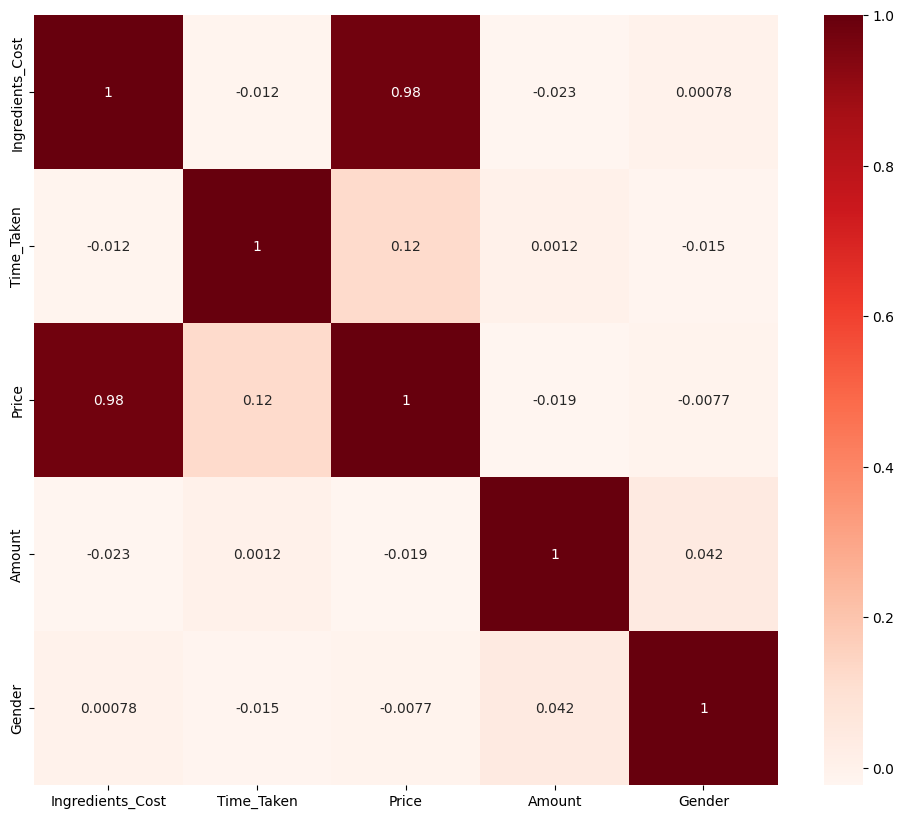

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

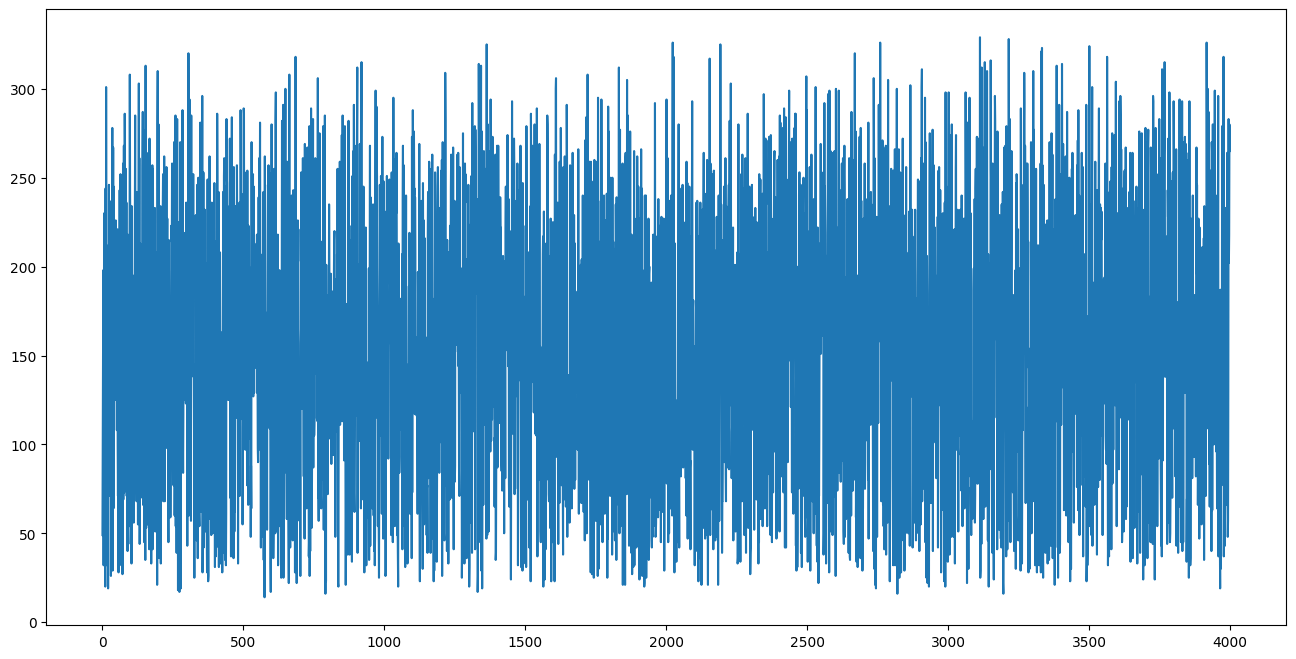

In [46]:
plt.figure(figsize=(16,8))
plt.plot(df['Price'])
plt.xlable('Gender',frontsize=18)
plt.xlable('price',frontsize=18)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
X = df[['Ingredients_Cost']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [59]:
print(model)

LinearRegression()


In [53]:
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 257.9942819918727


In [56]:
model.score(X_test, y_test)

0.9525301053589033

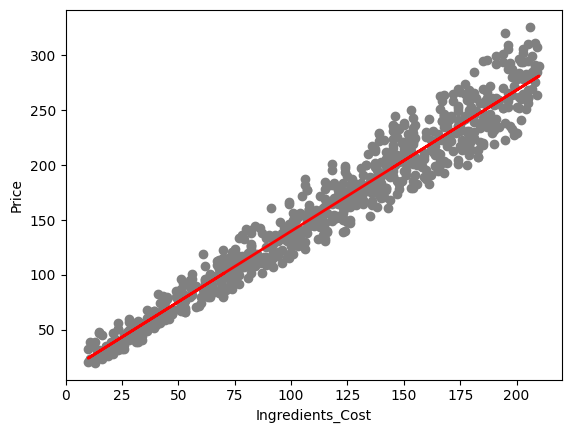

In [58]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Ingredients_Cost')
plt.ylabel('Price')
plt.show()